In [1]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [2]:
hindcast = True

if(not hindcast):
# most recent forecast
    url = 'http://fvcom.smast.umassd.edu:8080/thredds/dodsC/FVCOM/NECOFS/Forecasts/NECOFS_GOM3_FORECAST.nc'
    ds = xr.open_dataset(url, drop_variables='siglay')
else:
    # 30-year hindcast, irivers, but no tides
    url = 'http://fvcom.smast.umassd.edu:8080/thredds/dodsC/fvcom/hindcasts/30yr_gom3'
    ds = xr.open_dataset(url, drop_variables=('siglev','siglay'),decode_times=False)

In [3]:
ds

<xarray.Dataset>
Dimensions:        (four: 4, maxelem: 9, maxnode: 11, nele: 90415, node: 48451, siglay: 45, siglev: 46, three: 3, time: 342348)
Coordinates:
    lon            (node) float32 ...
    lat            (node) float32 ...
    lonc           (nele) float32 ...
    latc           (nele) float32 ...
  * time           (time) float32 43509.0 43509.043 ... 57753.957 57754.0
Dimensions without coordinates: four, maxelem, maxnode, nele, node, siglay, siglev, three
Data variables:
    nprocs         int32 ...
    partition      (nele) int32 ...
    x              (node) float32 ...
    y              (node) float32 ...
    xc             (nele) float32 ...
    yc             (nele) float32 ...
    h              (node) float32 ...
    nv             (three, nele) int32 ...
    nbe            (three, nele) int32 ...
    ntsn           (node) int32 ...
    nbsn           (maxnode, node) int32 ...
    ntve           (node) int32 ...
    nbve           (maxelem, node) int32 ...
    a1u            (four, nele) float32 ...
    a2u            (four, nele) float32 ...
    aw0            (three, nele) float32 ...
    awx            (three, nele) float32 ...
    awy            (three, nele) float32 ...
    art2           (node) float32 ...
    art1           (node) float32 ...
    iint           (time) int32 ...
    Itime          (time) int32 ...
    Itime2         (time) int32 ...
    Times          (time) |S64 ...
    zeta           (time, node) float32 ...
    file_date      (time) |S64 ...
    u              (time, siglay, nele) float32 ...
    v              (time, siglay, nele) float32 ...
    omega          (time, siglev, node) float32 ...
    ww             (time, siglay, nele) float32 ...
    ua             (time, nele) float32 ...
    va             (time, nele) float32 ...
    temp           (time, siglay, node) float32 ...
    salinity       (time, siglay, node) float32 ...
    km             (time, siglev, node) float32 ...
    kh             (time, siglev, node) float32 ...
    kq             (time, siglev, node) float32 ...
    q2             (time, siglev, node) float32 ...
    q2l            (time, siglev, node) float32 ...
    l              (time, siglev, node) float32 ...
    short_wave     (time, node) float32 ...
    net_heat_flux  (time, node) float32 ...
    uwind_stress   (time, nele) float32 ...
    vwind_stress   (time, nele) float32 ...
    fvcom_mesh     int32 ...
Attributes:
    title:                       GOM3 Nesting  by Yf.Sun@umassd.edu
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_3.0
    history:                     model started at: 22/12/2011   16:41
    references:                  http://fvcom.smast.umassd.edu, http://codfis...
    Conventions:                 CF-1.4, UGRID-0.9
    CoordinateSystem:            Cartesian
    CoordinateProjection:        none
    Tidal_Forcing:               TIDAL ELEVATION FORCING IS OFF!
    River_Forcing:               THERE ARE 50 RIVERS IN THIS MODEL.\nRIVER IN...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  FVCOM periodic surface precip forcing:\nFILE...
    cdm_data_type:               any
    DODS.strlen:                 26
    DODS.dimName:                DateStrLen

In [4]:
print(ds.time[0].values)
print(ds.time[-1].values)

43509.0
57754.0


In [5]:
if(hindcast):
    ts = np.datetime64('1858-11-17 00:00:00')+np.timedelta64(int(ds.time[0].values),'D')
    te = np.datetime64('1858-11-17 00:00:00')+np.timedelta64(int(ds.time[-1].values),'D')
    time = np.arange(ts,te,dtype='datetime64[h]')
    print(ts, te)
    print(time)

1978-01-01T00:00:00 2017-01-01T00:00:00
['1978-01-01T00' '1978-01-01T01' '1978-01-01T02' ... '2016-12-31T21'
 '2016-12-31T22' '2016-12-31T23']


In [6]:
# Find the indices of the points in (x,y) closest to the points in (xi,yi)
def nearxyn(x,y,xi,yi):    
    ind=np.ones(len(xi),dtype=int)
    for i in np.arange(len(xi)):
        dist=np.sqrt((x-xi[i])**2+(y-yi[i])**2)
        ind[i]=dist.argmin()    
    return ind

# Find the indices of the point in (x,y) closest to the point (xi,yi)
def nearxy(x,y,xi,yi):
    dist=np.sqrt((x-xi)**2+(y-yi)**2)
    ind=dist.argmin()     
    return ind

coords = [-70.0643, 42.0643]

# Query to find closest NECOFS nodes to station locations
nodeid = nearxy(ds.lon,ds.lat,coords[0],coords[1])
print(ds.lon[nodeid].values,ds.lat[nodeid].values,ds.h[nodeid].values)

-70.05605 42.064137 26.3185


2015-07-25T00


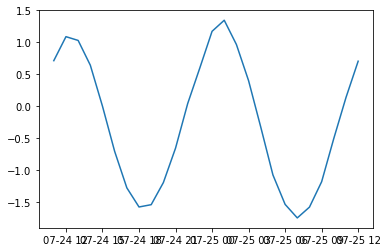

In [7]:
if(not hindcast):
    # pick a specific time
    ds.sel(time="2021-11-27T12:00:00.000000")
    # or a time slice
    dst = ds.sel(time=slice("2021-11-27T12:00:00.000000","2021-11-27T18:00:00.000000"))

    # could grab as arrays and plot
    #t = dst.time[:].values
    #zeta = dst.zeta[:,nodeid].values
    #plt.plot(t,zeta)
    
    # but this is easier
    zeta = dst.zeta[200:225,nodeid]
    zeta.plot()
    
else:
    tid = np.argmin(time<np.datetime64("2015-07-25",'h'))
    print(time[tid])
    t = time[tid-13:tid+13]
    zeta = ds.zeta[tid-13:tid+13,nodeid]
    plt.plot(t,zeta)